### Imports & Variable definition.

In [1]:
# Import Tensorflow & matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt

# Define Dataset.
X = tf.range(-100, 100, 4)

# Define Labels.
y = X + 10


/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lycn/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

### Define plotScatter Function.

In [2]:
def plotScatter(plottingVariables):
    # Create a new figure wth static values.
    plt.figure(figsize=(10, 7))
    
    # Scatter Chart for dataset & labels.
    for k, v in plottingVariables.items():
        plt.scatter(v['X'], v['y'], label=k)

    # Generate Legend.
    plt.legend();

### Slice Dataset & Labels

In [3]:

# 80% of data for training the model.
trainingSet = {
    "X": X[:40],
    "y": y[:40]
}

# The last 20% of data.
testingSet = {
    "X": X[40:],
    "y": y[40:]
}

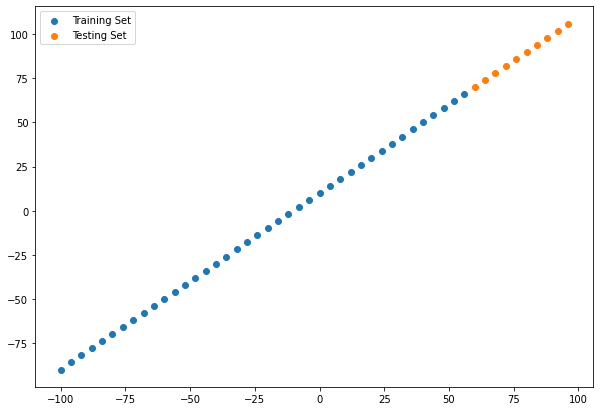

In [4]:
plotScatter({"Training Set": trainingSet, "Testing Set": testingSet})

### Setting uo the Machine Learning Model.

In [22]:
# 1. Creating a model
model = tf.keras.Sequential([
    # Input layer for Neural Network.
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(70),
    tf.keras.layers.Dense(1),
    # Output Layer.
    tf.keras.layers.Dense(1, name="output_layer")
], "predict-number-in-chain")

# 2. Compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

# 3. Summarize the model.
model.summary()

Model: "predict-number-in-chain"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 70)                140       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 71        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 2         
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [23]:
model.fit(trainingSet['X'], trainingSet['y'], epochs=100, verbose=0)

### Neural Network Visualization

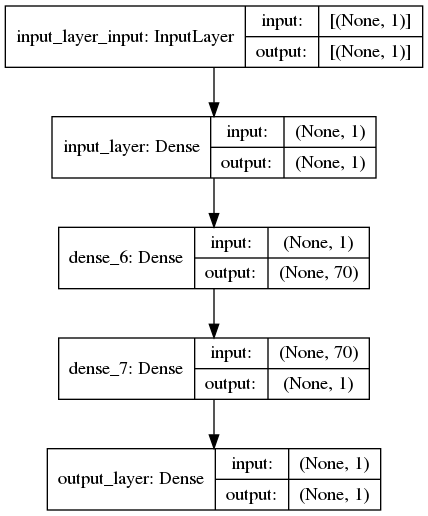

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes="true")

### Create Prediction

In [32]:
y_pred = model.predict(testingSet['X'])
y_pred

array([[ 70.17989 ],
       [ 74.195465],
       [ 78.21105 ],
       [ 82.22664 ],
       [ 86.24222 ],
       [ 90.25779 ],
       [ 94.27336 ],
       [ 98.288956],
       [102.30454 ],
       [106.32011 ]], dtype=float32)

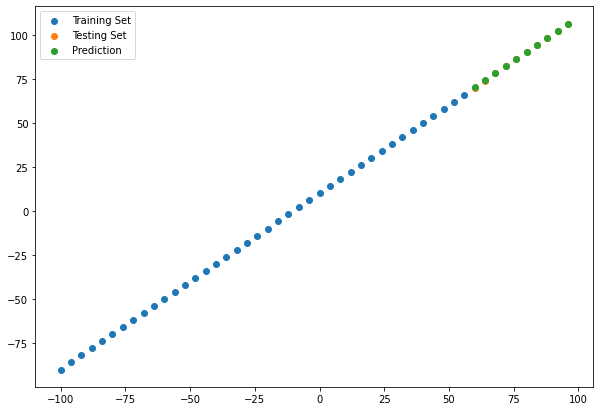

In [25]:
plotScatter({"Training Set": trainingSet, "Testing Set": testingSet, "Prediction": {"X": testingSet['X'], "y": y_pred}})

### Evaluating the model's prediction.

In [33]:
model.evaluate(testingSet['X'], testingSet['y'])

10/10 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.2500


[0.25000229477882385, 0.2500023]

In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(testingSet['y'], tf.squeeze(y_pred))
mae

<tf.Tensor: id=14053, shape=(), dtype=float32, numpy=0.2500023>

In [40]:
# Calculate Mean Squared Error
mse = tf.metrics.mean_squared_error(testingSet['y'], tf.squeeze(y_pred))
mse

<tf.Tensor: id=14066, shape=(), dtype=float32, numpy=0.064503744>

### Experiments to improve the model.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])